# Fundamentals of Machine Learning - Exercise 2
* The aim of the exercise is to learn basic techniques for visualization creation and interpretation using Matplotlib and Seaborn libraries.

![meme02](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_02_meme_02.png?raw=true)

# Exploratory data analysis

Data source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Important attributes description:
* SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* Heating: Type of heating
* CentralAir: Central air conditioning
* GrLivArea: Above grade (ground) living area square feet
* BedroomAbvGr: Number of bedrooms above basement level

## Import used packages

In [2]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

## Load the data into the Pandas DataFrame - in our case it is a csv file
* https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv

In [3]:
url = "https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv"
df = pd.read_csv(url)

## Price is the most interisting attribute in our dataset, let's take a look on its distribution
- SalePrice

## Vizualize house prices in form of histogram
- What does it tell us about the prices?

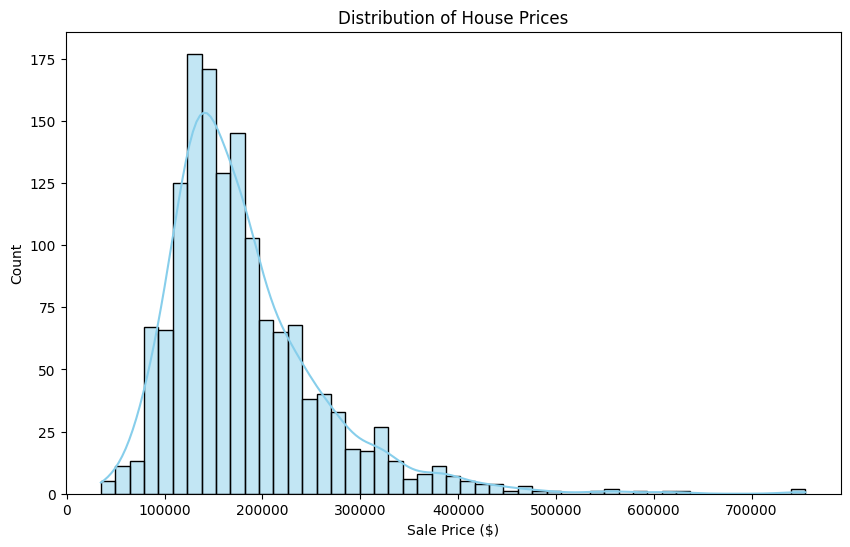

In [4]:
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], kde=True, color="skyblue")
plt.title("Distribution of House Prices")
plt.xlabel("Sale Price ($)")
plt.ylabel("Count")
plt.show()


### Modify bins
- Perhaps we want to visualize the histogram with more dense or coarse bins
- *bins* attribute

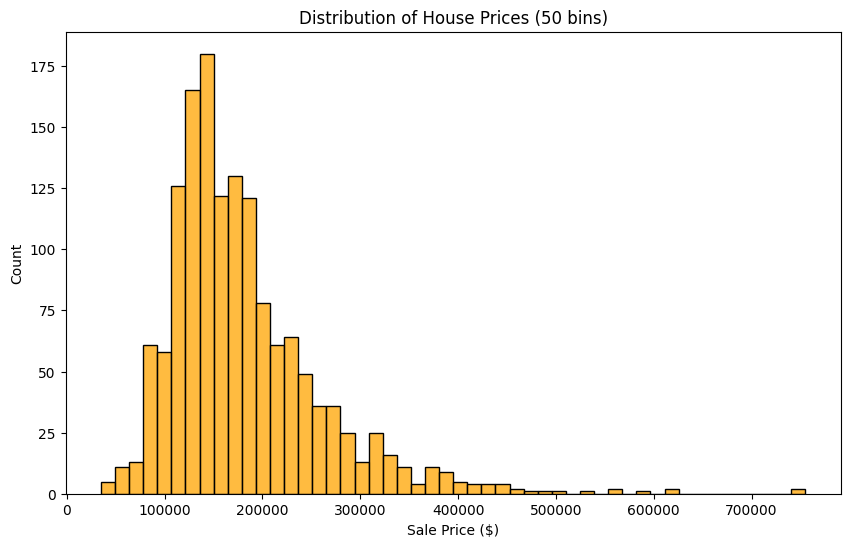

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], bins=50, kde=False, color="orange")  # viac binov = detailnejší pohľad
plt.title("Distribution of House Prices (50 bins)")
plt.xlabel("Sale Price ($)")
plt.ylabel("Count")
plt.show()


### Use quartiles (Q1, Q3) for highlighting most common price range in histogram

* Check functions *describe* and *quantile* over price column

Q1 (25%): 129975.0
Q3 (75%): 214000.0
IQR: 84025.0


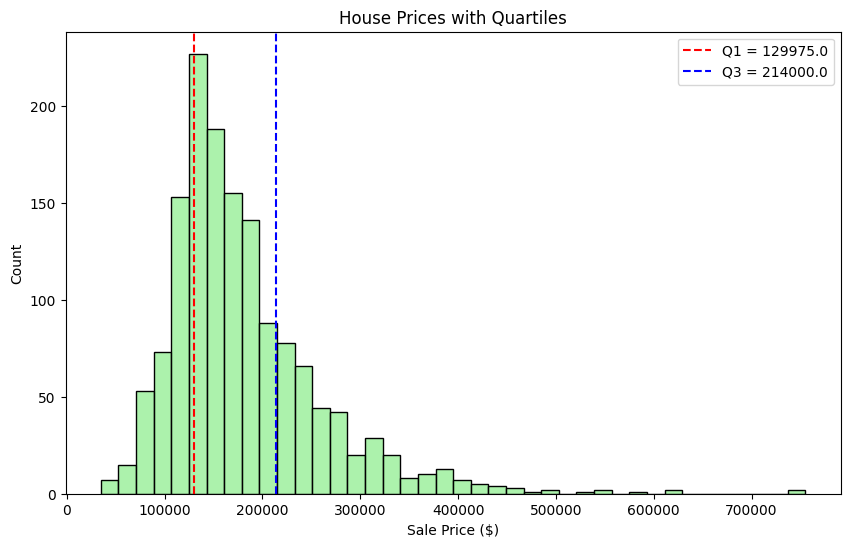

In [6]:
# Výpočet kvartilov
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

print("Q1 (25%):", Q1)
print("Q3 (75%):", Q3)
print("IQR:", IQR)

# Histogram s vyznačením Q1 a Q3
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], bins=40, color="lightgreen")
plt.axvline(Q1, color='red', linestyle='--', label=f"Q1 = {Q1}")
plt.axvline(Q3, color='blue', linestyle='--', label=f"Q3 = {Q3}")
plt.title("House Prices with Quartiles")
plt.xlabel("Sale Price ($)")
plt.ylabel("Count")
plt.legend()
plt.show()


In [7]:
df['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## 🔎 What can we say about prices based on the quantiles?
### Use function *axvline* from Matplotlib to draw vertical lines at the quartile positions

In [8]:
# uisti sa, že máme správne typy a kategórie
df['GarageFinish'] = df['GarageFinish'].fillna('NA').astype('category')
cat_order = ['NA', 'Unf', 'RFn', 'Fin']  # logické poradie kategórií
df['GarageFinish'] = df['GarageFinish'].cat.set_categories(cat_order, ordered=True)


## 📊 Let's add more complexity to histogram vizualizations. 
### Does price change for different values of GaragaFinish attribute?

### GarageFinish: Interior finish of the garage
- Fin	Finished
- RFn	Rough Finished	
- Unf	Unfinished
- NA	No Garage

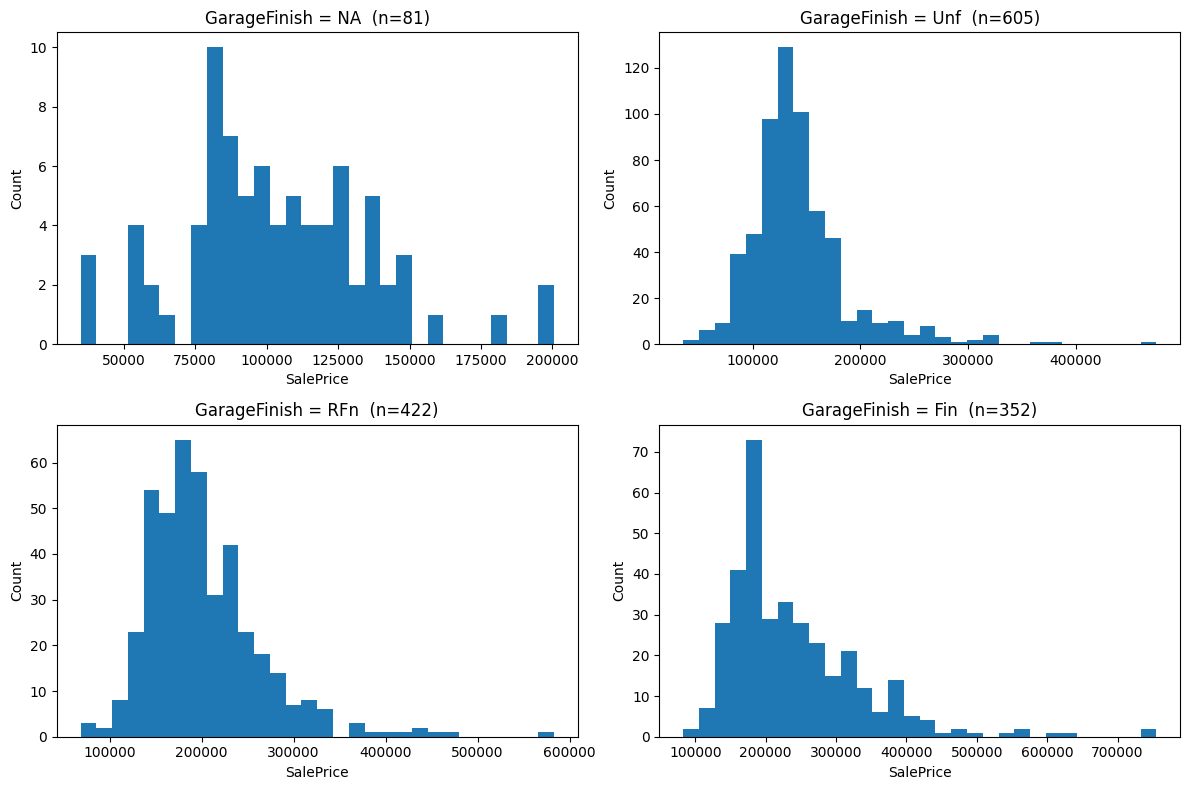

In [9]:
import matplotlib.pyplot as plt

gfin_values = df['GarageFinish'].cat.categories.tolist()

# 2x2 mriežka
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for ax, gf in zip(axes, gfin_values):
    subset = df[df['GarageFinish'] == gf]['SalePrice'].dropna()
    ax.hist(subset, bins=30)  # jednoduchý histogram (žiadne špecifické farby)
    ax.set_title(f"GarageFinish = {gf}  (n={len(subset)})")
    ax.set_xlabel("SalePrice")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


### 💡 We can see that houses with no garage are somehow missing
- The no garage houses have a *nan* value in the feature so they are not plotted

### Fill nan values with 'NoGarage' string

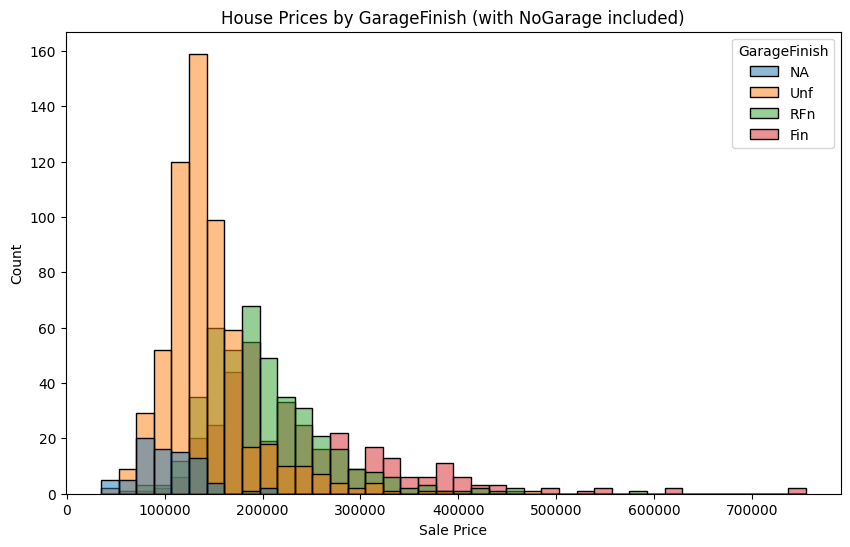

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='SalePrice', hue='GarageFinish', bins=40, kde=False)
plt.title("House Prices by GarageFinish (with NoGarage included)")
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.show()


### Take a look at the histogram again

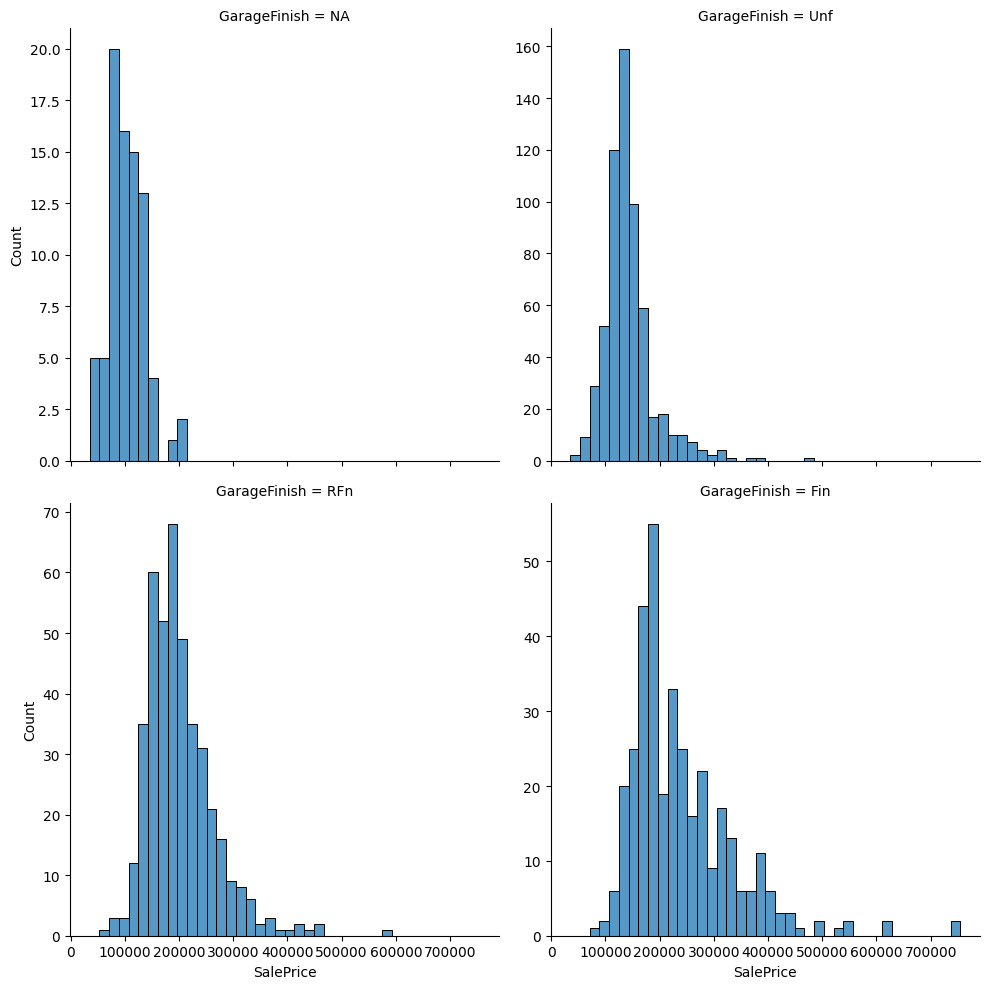

In [12]:
g = sns.displot(
    data=df,
    x="SalePrice",
    col="GarageFinish",
    col_wrap=2,   # 2 stĺpce → prehľadná mriežka
    bins=40,
    kde=False,
    facet_kws={'sharey': False}  # nezdieľať Y os, aby bol každý graf dobre čitateľný
)
g.set_titles("GarageFinish = {col_name}")
plt.show()


## 💡 Sometimes the histograms distinguished by colors are not easily redeable
- We can use *col* attribute to automatically plot every histogram on its own canvas

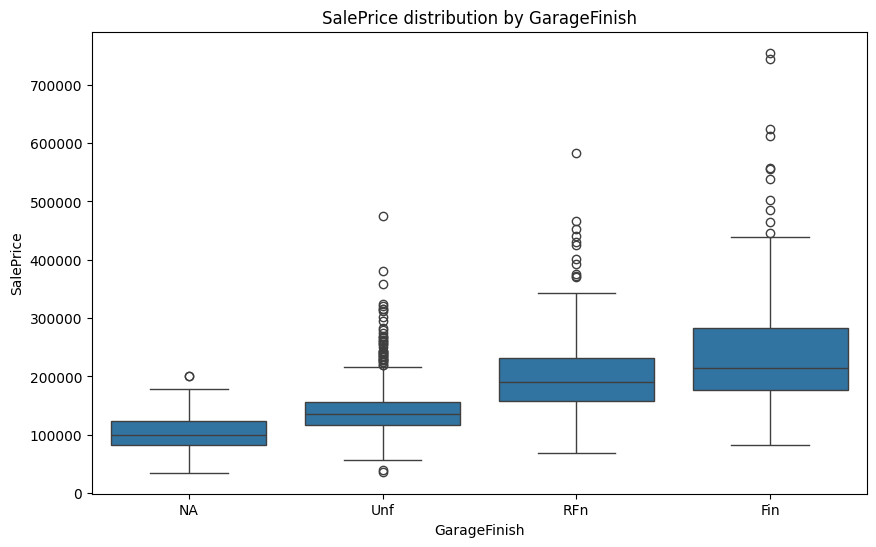

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='GarageFinish', y='SalePrice')
plt.title("SalePrice distribution by GarageFinish")
plt.show()


# 📊 Another very useful tecnique for the numerical features distributions are boxplots
- 🔎 Did you see any of these before?

- 🔎 How should we read boxplots?
    - **Quartiles**
    - **Median**
    - Box size
    - **Outliers and IQR**
    - Min/max - with or without outliers

### Plot only the *SalePrice* using boxplot

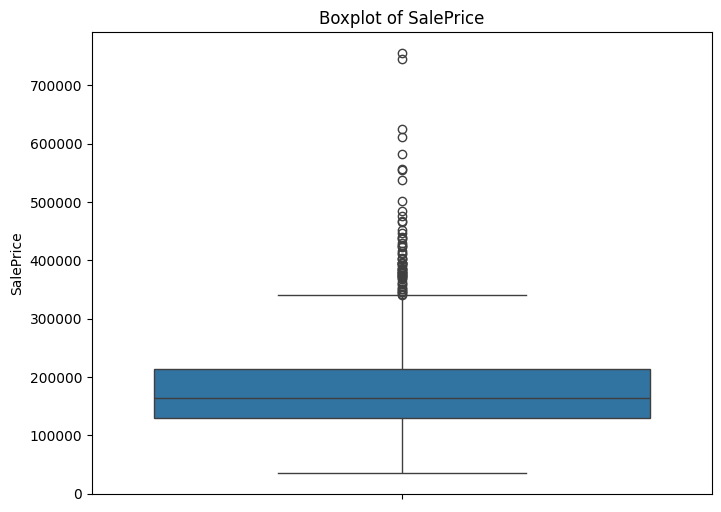

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['SalePrice'])
plt.title("Boxplot of SalePrice")
plt.ylabel("SalePrice")
plt.show()


## Let's take a look at the *SalePrice* for different *BldgType* values 
- 🔎 What can we say about the prices?

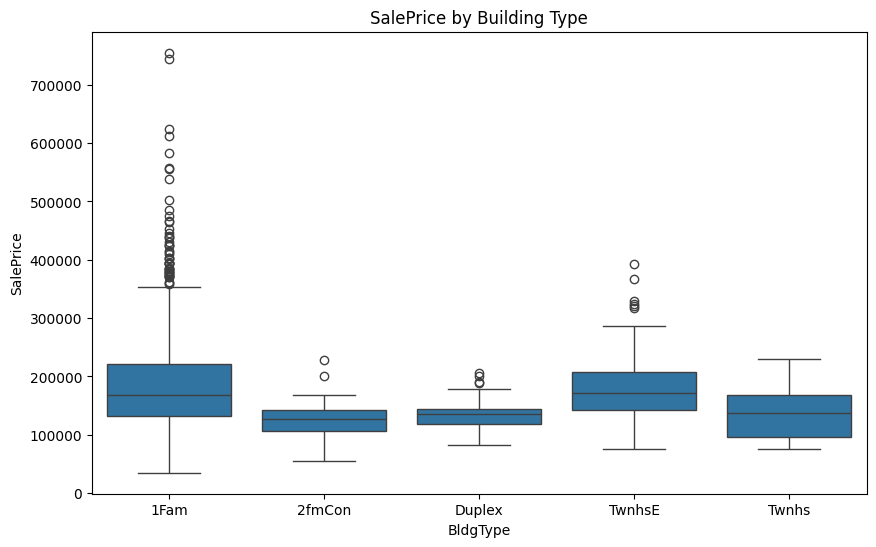

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='BldgType', y='SalePrice')
plt.title("SalePrice by Building Type")
plt.xlabel("BldgType")
plt.ylabel("SalePrice")
plt.show()


## We can do the same for *GrLivArea*

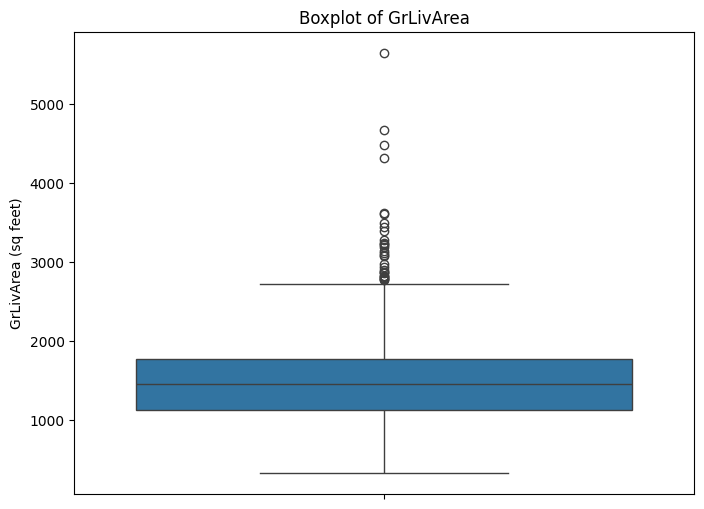

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['GrLivArea'])
plt.title("Boxplot of GrLivArea")
plt.ylabel("GrLivArea (sq feet)")
plt.show()


## Let's take a look at the *GrLivArea* for different *BldgType* values 
- 🔎 What can we say about the GrLivArea?

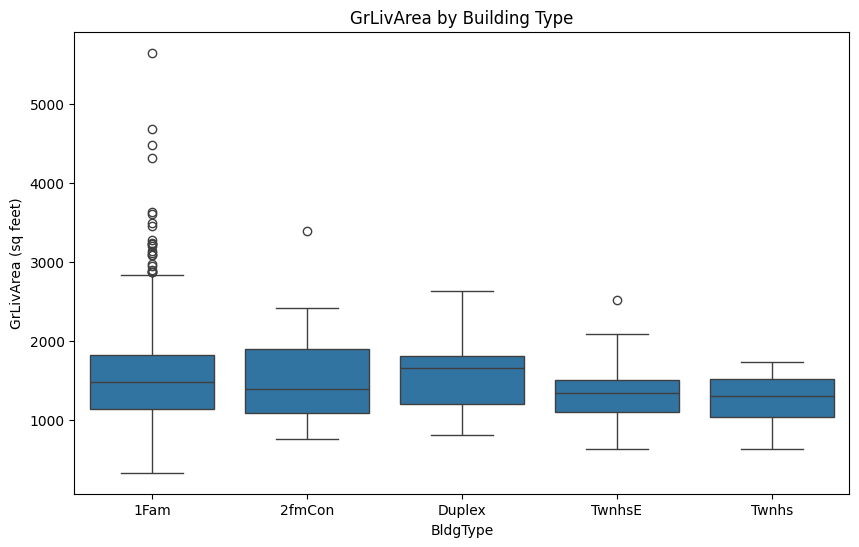

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='BldgType', y='GrLivArea')
plt.title("GrLivArea by Building Type")
plt.xlabel("BldgType")
plt.ylabel("GrLivArea (sq feet)")
plt.show()



# 📊 Scatter plots are commonly used for visualizing two numerical variables

### We can use standard *scatterplot* with *BldgType* as a *hue* so we can better grasp the relationship between *GrLivArea* and *SalePrice*
* Try to set *alpha* parameter for opacity settings

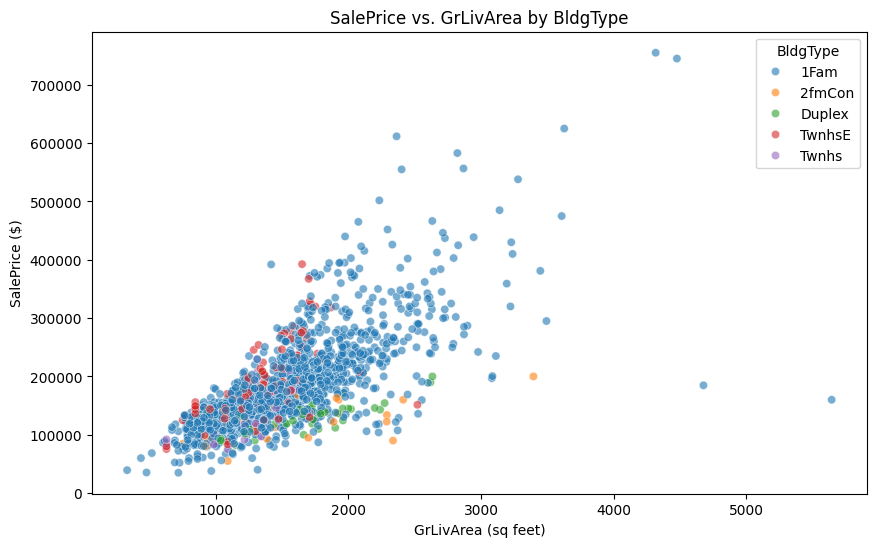

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', hue='BldgType', alpha=0.6)
plt.title("SalePrice vs. GrLivArea by BldgType")
plt.xlabel("GrLivArea (sq feet)")
plt.ylabel("SalePrice ($)")
plt.legend(title="BldgType")
plt.show()


### We can see there are some outliers in the data, let's zoom only to area without them, how can we filter the data?

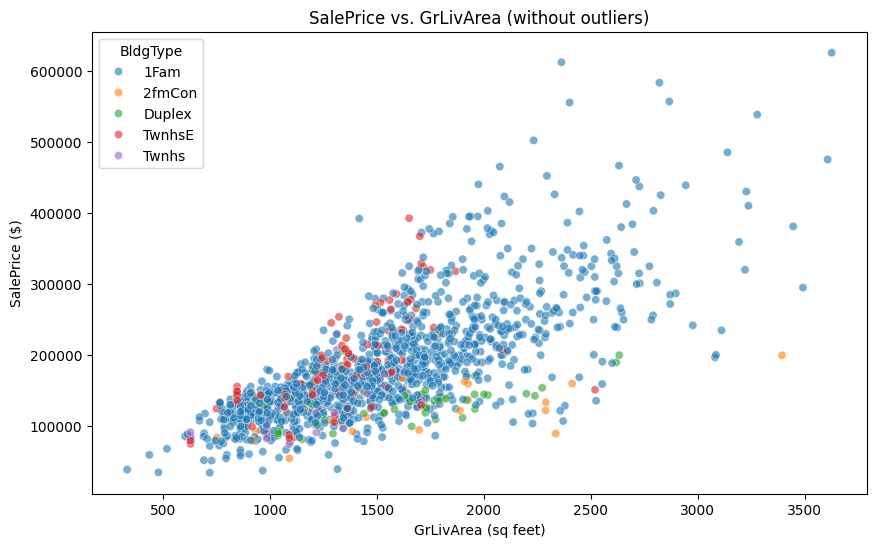

In [19]:
df_filtered = df[(df['GrLivArea'] < 4500) & (df['SalePrice'] < 700000)]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_filtered, x='GrLivArea', y='SalePrice', hue='BldgType', alpha=0.6)
plt.title("SalePrice vs. GrLivArea (without outliers)")
plt.xlabel("GrLivArea (sq feet)")
plt.ylabel("SalePrice ($)")
plt.legend(title="BldgType")
plt.show()


# We have an information about a month and a year for the sold houses.
## 🔎 Can you vizualize what was the average price of the house by quarters?

* We need to create a new column **YearQuarterSold** with merged Year and Quarter information in this pattern: '2010-1','2010-2' and so on first
    * We can map the values using the *apply* function or use string concatenation directly
* 💡 If you need to change data type of the columns, you can use *astype*

In [20]:
# prepočet mesiaca na kvartál
df['Quarter'] = ((df['MoSold'] - 1) // 3 + 1).astype(int)

# vytvoríme stĺpec YearQuarterSold (napr. 2010-Q2)
df['YearQuarterSold'] = df['YrSold'].astype(str) + '-Q' + df['Quarter'].astype(str)


### Compute the average price for the *YearQuarterSold* attribute

In [21]:
avg_price = df.groupby('YearQuarterSold')['SalePrice'].mean().reset_index()
avg_price.head()


,YearQuarterSold,SalePrice
0,2006-Q1,190553.522727
1,2006-Q2,168277.176991
2,2006-Q3,191858.980952
3,2006-Q4,187993.480769
4,2007-Q1,178489.159091


## Vizualize the data using *lineplot*
- In case of xlabels mixing try to tune the *rotation* and *horizontalalignment* parameters

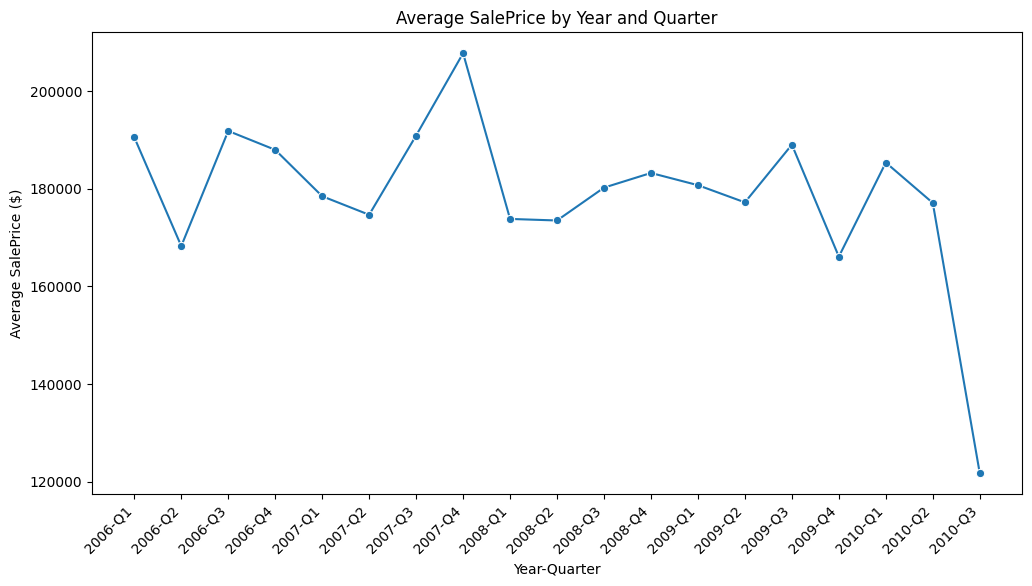

In [22]:
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_price, x='YearQuarterSold', y='SalePrice', marker='o')
plt.title("Average SalePrice by Year and Quarter")
plt.xlabel("Year-Quarter")
plt.ylabel("Average SalePrice ($)")
plt.xticks(rotation=45, ha="right")
plt.show()


### Add the max, min and median to the plot
- Use *describe* and the [Pandas Melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) function
    - use YearQuarterSold as an *id_vars*
    - use 'min', 'mean', '50%', 'max' as *value_vars*

In [ ]:
df.groupby('YearQuarterSold').SalePrice.describe().reset_index()

![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_02_meme_01.png?raw=true)

In [ ]:
df_agg = df.groupby('YearQuarterSold').SalePrice.describe().reset_index()
df_melt = pd.melt(df_agg, id_vars=['YearQuarterSold'], value_vars=['min', 'mean', '50%', 'max'])
df_melt

## What can we say about the minimum and maximum values?
- 💡Take a look at std. deviation

In [ ]:
fig = plt.figure(figsize=(9,6))
sns.lineplot(data=df_melt, x='YearQuarterSold', y='value', hue='variable')
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

# We can take a look at number of sold houses for the defined time periods as well
## 📊 We will use standard bar plot
- 🔎 In which quarter were the most houses sold?
- 💡 Fun facts: [https://themortgagereports.com/44135/whats-the-best-time-of-year-to-sell-a-home](https://themortgagereports.com/44135/whats-the-best-time-of-year-to-sell-a-home)

In [23]:
# ak ešte nemáš kvartál:
df['Quarter'] = ((df['MoSold'] - 1) // 3 + 1).astype(int)
df['YearQuarterSold'] = df['YrSold'].astype(str) + '-Q' + df['Quarter'].astype(str)


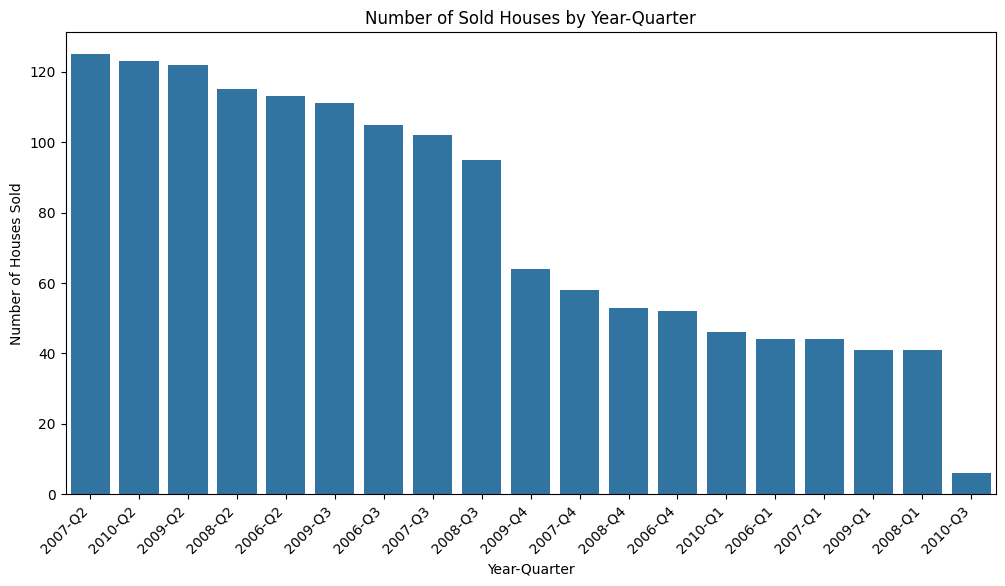

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='YearQuarterSold', order=df['YearQuarterSold'].value_counts().index)
plt.title("Number of Sold Houses by Year-Quarter")
plt.xlabel("Year-Quarter")
plt.ylabel("Number of Houses Sold")
plt.xticks(rotation=45, ha="right")
plt.show()


# Tasks (2p)
## ✅ Task 1 - Outlier detection (1p)
- We need to somehow mark the outliers in the data according to the *SalePrice* and *GrLivArea*
    - One possibility is to compute [IQR](https://www.statisticshowto.com/probability-and-statistics/interquartile-range/) for both columns and mark outliers using lower and upper bounds
    - Lower bound: Q1 - 1.5*IQR
    - Upper bound: Q3 + 1.5*IQR
- 💡 If the house has *SalePrice* **OR** *GrLivArea* value outside of the bounds - it is an outlier
- Vizualize the data using scatter plot and distinguish the outlier and non-outlier data using different colors (*hue*) 💡

## ✅ Task 2 - Describe what you see in the data (1p)
- Try to vizualize the relationship between *SalePrice* and *OverallQual*
    - 💡You can use BoxPlots, Scatter plots, etc., the choice of a right plot type is up to you 🙂
- Do the same for *SalePrice* and *OverallCond*; i.e. vizualize and describe insight-
- **Describe the insight you got from the plots with a few sentences in a Markdown cell below the plot**
    - ❌ Plot interpretation figured in real-time during task check is not allowed! ❌

In [25]:
def outlier_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return lower, upper

# hranice
sp_lower, sp_upper = outlier_bounds(df['SalePrice'])
gl_lower, gl_upper = outlier_bounds(df['GrLivArea'])

print("SalePrice bounds:", sp_lower, sp_upper)
print("GrLivArea bounds:", gl_lower, gl_upper)


SalePrice bounds: 3937.5 340037.5
GrLivArea bounds: 158.625 2747.625


In [27]:
df['Outlier'] = (
    (df['SalePrice'] < sp_lower) | (df['SalePrice'] > sp_upper) |
    (df['GrLivArea'] < gl_lower) | (df['GrLivArea'] > gl_upper)
)


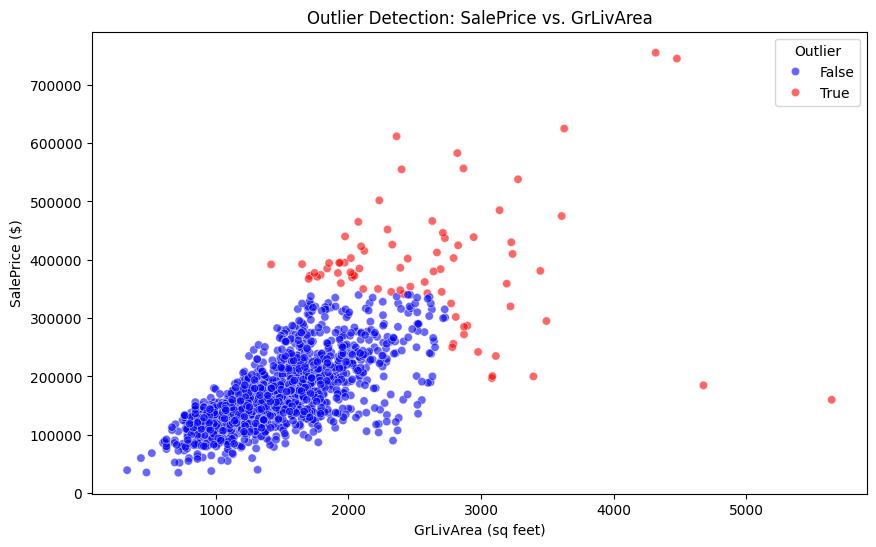

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='GrLivArea', y='SalePrice',
    hue='Outlier', palette={True:'red', False:'blue'}, alpha=0.6
)
plt.title("Outlier Detection: SalePrice vs. GrLivArea")
plt.xlabel("GrLivArea (sq feet)")
plt.ylabel("SalePrice ($)")
plt.legend(title="Outlier")
plt.show()


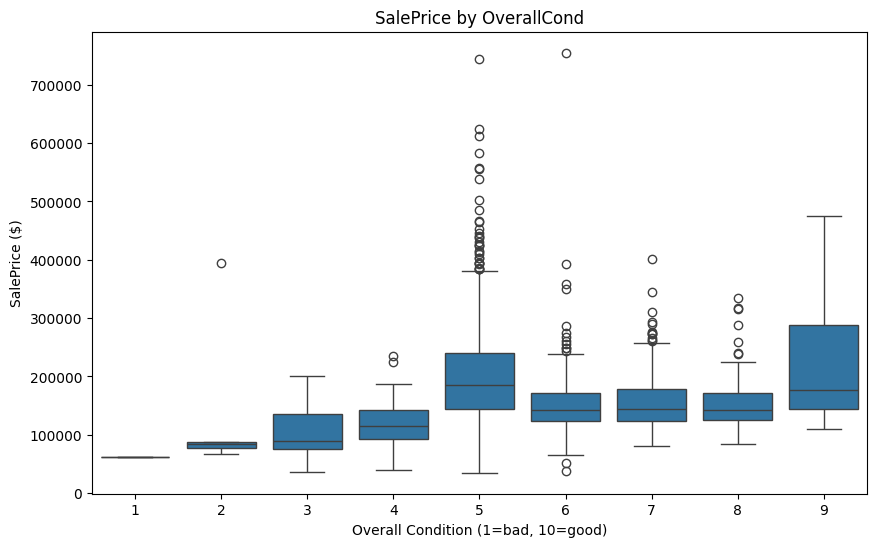

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='OverallCond', y='SalePrice')
plt.title("SalePrice by OverallCond")
plt.xlabel("Overall Condition (1=bad, 10=good)")
plt.ylabel("SalePrice ($)")
plt.show()


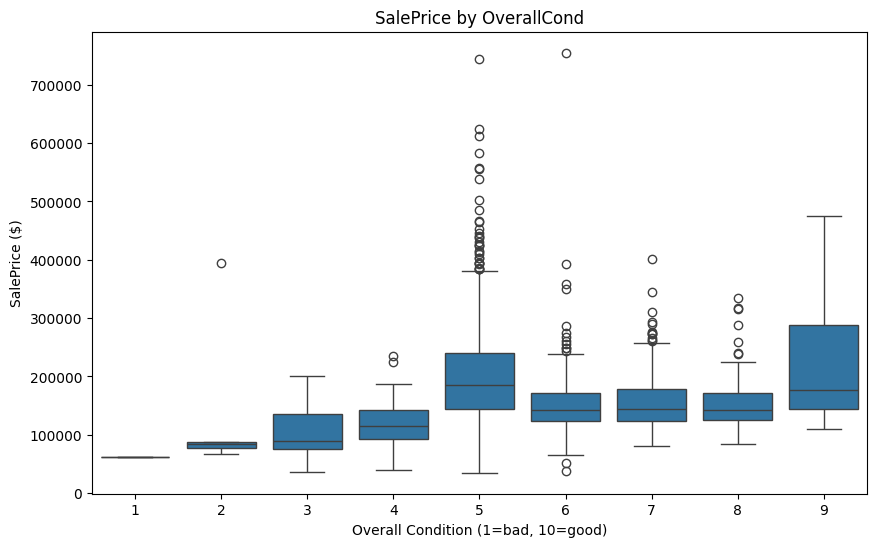

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='OverallCond', y='SalePrice')
plt.title("SalePrice by OverallCond")
plt.xlabel("Overall Condition (1=bad, 10=good)")
plt.ylabel("SalePrice ($)")
plt.show()


### Insights from the plots

- **Outlier detection**  
  We found that several houses have extremely high `SalePrice` or very large `GrLivArea`.  
  These appear as outliers in the scatter plot (red points). They may represent luxury houses or data entry errors.

- **SalePrice vs OverallQual**  
  There is a strong positive relationship: houses with higher quality (`OverallQual` = 8–10) have much higher sale prices.  
  The median price grows steeply with quality. Outliers are present, but the trend is clear.

- **SalePrice vs OverallCond**  
  The relationship is weaker compared to `OverallQual`. Most houses have similar prices across different condition ratings,  
  meaning condition is less important than overall material/quality when predicting price.
